In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
class Value:

    def __init__(self, data, _children=(), _op='', label = '') -> None:
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value({self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        x = self.data
        tanh_formula = (math.exp(2 * x) - 1 / math.exp(2 * x) + 1)
        out = Value(tanh_formula, (self), 'tanh')

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd' 
f = Value(-2.0, label='f')
L = d * f; L.label = 'L' 

L

Value(-8.0)

In [21]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

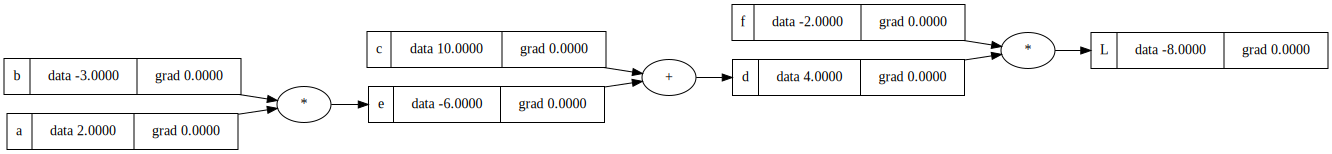

In [22]:
draw_dot(L)

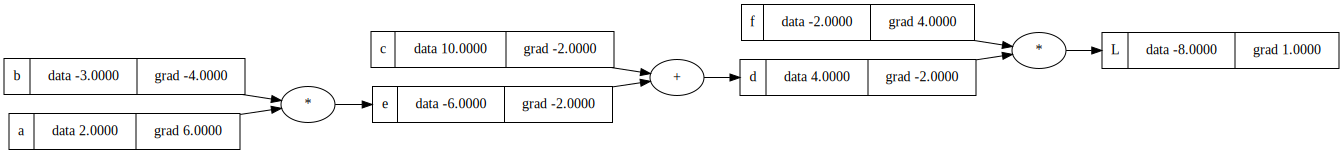

In [23]:
def backprop_by_hand(): # the chain rule!
    L.grad = 1
    d.grad = f.data # dL/dd = dL/dd = -2.0
    f.grad = d.data # dL/df = dL/df = 4.0

    e.grad = d.grad  # dL/de = dd/de * dL/dd = -2.0
    c.grad = d.grad # dL/dc = dd/dc * dL/dd = -2.0

    b.grad = a.data * e.grad # dL/db = de/db * dL/de = -4.0
    a.grad = b.data * e.grad # dL/da = de/da * dL/de = 6.0

    return draw_dot(L)

backprop_by_hand()

In [24]:
# optimization - one step at the time
print(f'before: {L.data}')

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(f'after: {L.data}')

before: -8.0
after: -7.286496


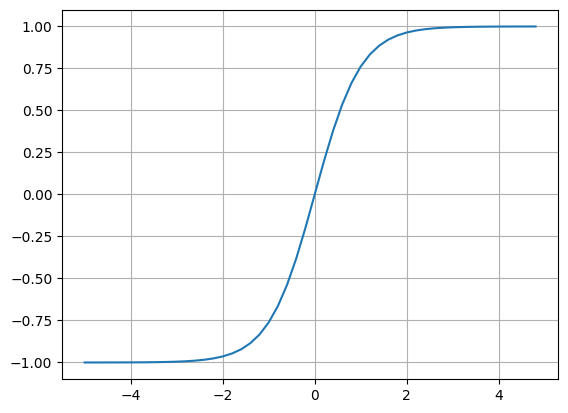

In [25]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid()

In [26]:
# single neuron

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

TypeError: 'Value' object is not iterable

In [ ]:
draw_dot(o)